In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization

In [3]:
train = pd.read_csv("../input/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv("../input/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = np.array(train.drop(['label'], axis = 1))
y_train = np.array(train['label'])
X_test = np.array(test)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [9]:
y_train_Enc = to_categorical(y_train)
y_train_Enc[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

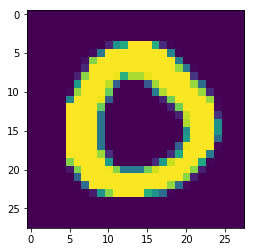

In [10]:
plt.imshow(X_train[4,:,:,:].reshape(28,28))
plt.show()

In [11]:
y_train[4]

0

In [12]:
batch_size = 32
epochs = 50
num_classes = 10

In [13]:
def baseline_model():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28,28,1), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
    model.add(LeakyReLU(alpha = 0.1))                  
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(LeakyReLU(alpha = 0.1))                 
    
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])
    return model

In [14]:
estimator = KerasClassifier(build_fn=baseline_model, batch_size=batch_size,epochs=epochs,verbose=1)
estimator.fit(X_train, y_train_Enc)

Epoch 1/50
42000/42000 [==============================] - 37s 876us/step - loss: 0.1850 - acc: 0.9421
Epoch 2/50
42000/42000 [==============================] - 37s 870us/step - loss: 0.0533 - acc: 0.9830
Epoch 3/50
42000/42000 [==============================] - 37s 872us/step - loss: 0.0359 - acc: 0.9890
Epoch 4/50
42000/42000 [==============================] - 36s 865us/step - loss: 0.0264 - acc: 0.9916
Epoch 5/50
42000/42000 [==============================] - 37s 874us/step - loss: 0.0206 - acc: 0.9933
Epoch 6/50
42000/42000 [==============================] - 35s 844us/step - loss: 0.0146 - acc: 0.9953
Epoch 7/50
42000/42000 [==============================] - 34s 820us/step - loss: 0.0114 - acc: 0.9967
Epoch 8/50
42000/42000 [==============================] - 35s 840us/step - loss: 0.0089 - acc: 0.9974
Epoch 9/50
42000/42000 [==============================] - 34s 816us/step - loss: 0.0074 - acc: 0.9978
Epoch 10/50
36000/42000 [========================>.....] - ETA: 4s - loss: 0.0054 

In [15]:
y_pred = estimator.predict(X_test)

28000/28000 [==============================] - 6s 222us/step


In [16]:
pd.DataFrame({"ImageId": test.index + 1, "Label": y_pred}).to_csv("submission_08_1630.csv", index=False)